# Jaylen Hicks
## Final Report
### Hypothesis: Cancel culture has been prominent in the last couple of decades, when a celebrity acts in an unacceptable manner, they are shunned. I want to take a list of YouTubers and track their engagement after a boycott of their content has been called to see if cancel culture is effective, or if public relations teams can navigate through the controversy. For this, I will use Youtube's API as my potential data source. I believe that that data will show that after a while, people forget about the conntroversy, and continue to support the creator after their apology video.

#### Reference https://www.youtube.com/watch?v=2mSwcRb3KjQ I used this video as a reference to help guide me through the Youtube API in completing this report

I looked at five Youtube Accounts from diverent genres: One talk show host, one major gamers, a oscar award winning actor, one Netflix creator, and one boxer. I looked at 10 videos before their apology video, and ten videos after their apology video to track their viewership. I also looked at likes and other metric data to see if the public approved or disapproved of their content after their shunning.

In [22]:
import requests
import base64
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build 
import json
secrets_filename = 'API_KEY.txt'
api_keys = {}
API_KEY = 'API KEY'
youtube = build('youtube', 'v3', developerKey = API_KEY)

In [23]:
ellen_id = "UCp0hYYBW6IMayGgR-WeoCvQ"
colleen_id = "UCrbSjN1_5U7hqFKRA0nvFXQ"
logan_id = "UCG8rbF3g2AMX70yOd8vqIZg"
will_id = "UCKuHFYu3smtrl2AwwMOXOlg"
pew_id = "UC-lHJZR3Gqxm24_Vd_AJ5Yw"

Here are the channel IDs for each of the Five Channels. If we plug in the channel ID to the function below, we can change which canceled channel's data to analyze.

In [24]:
channel_id = "UCrbSjN1_5U7hqFKRA0nvFXQ"

This is defining a new function that getst the stats from the channel. It uses the Part section of the API, which is the only required input to retrieve data.

In [25]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    
    return response['items']

In [26]:
channel_stats = get_channel_stats(youtube, channel_id)

This is creating a new variable that get the channel stats from the given channel ID.

In [27]:
playlist_id = channel_stats[0]['contentDetails']

This is using the content Details component of the Youtube API to give the facts about each video.

In [28]:
def get_video_list(youtube, upload_id):
    video_list = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=upload_id,
        maxResults=50
    )
    next_page = True
    while next_page:
        response = request.execute()
        data = response['items']

        for video in data:
            video_id = video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)

        if 'nextPageToken' in response.keys():
            next_page = True
            request = youtube.playlistItems().list(
                part="snippet,contentDetails",
                playlistId=upload_id,
                pageToken=response['nextPageToken'],
                maxResults=50
            )
        else:
            next_page = False

    return video_list

Get Video List makes turns the content of th the chanels into an array that makes it easier for analysis. The next page token section is a method to see more than the 50th item in the list.

In [30]:
channel_stats = get_channel_stats(youtube, channel_id)

In [31]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UUrbSjN1_5U7hqFKRA0nvFXQ'

Get video details his a loop function that helps give information for each videa that the content creator has releases. This request will give infomromation about each video's Title, Publisuh date, view and like count etc.

In [32]:
video_list = get_video_list(youtube, playlist_id)

In [47]:
def get_video_details(youtube, video_list):
    stats_list=[]

    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict= dict(title=title, published=published, view_count=view_count, like_count=like_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [48]:
video_data = get_video_details(youtube, video_list)

# Colleen Ballinger

AttributeError: 'Axes' object has no attribute 'plt'

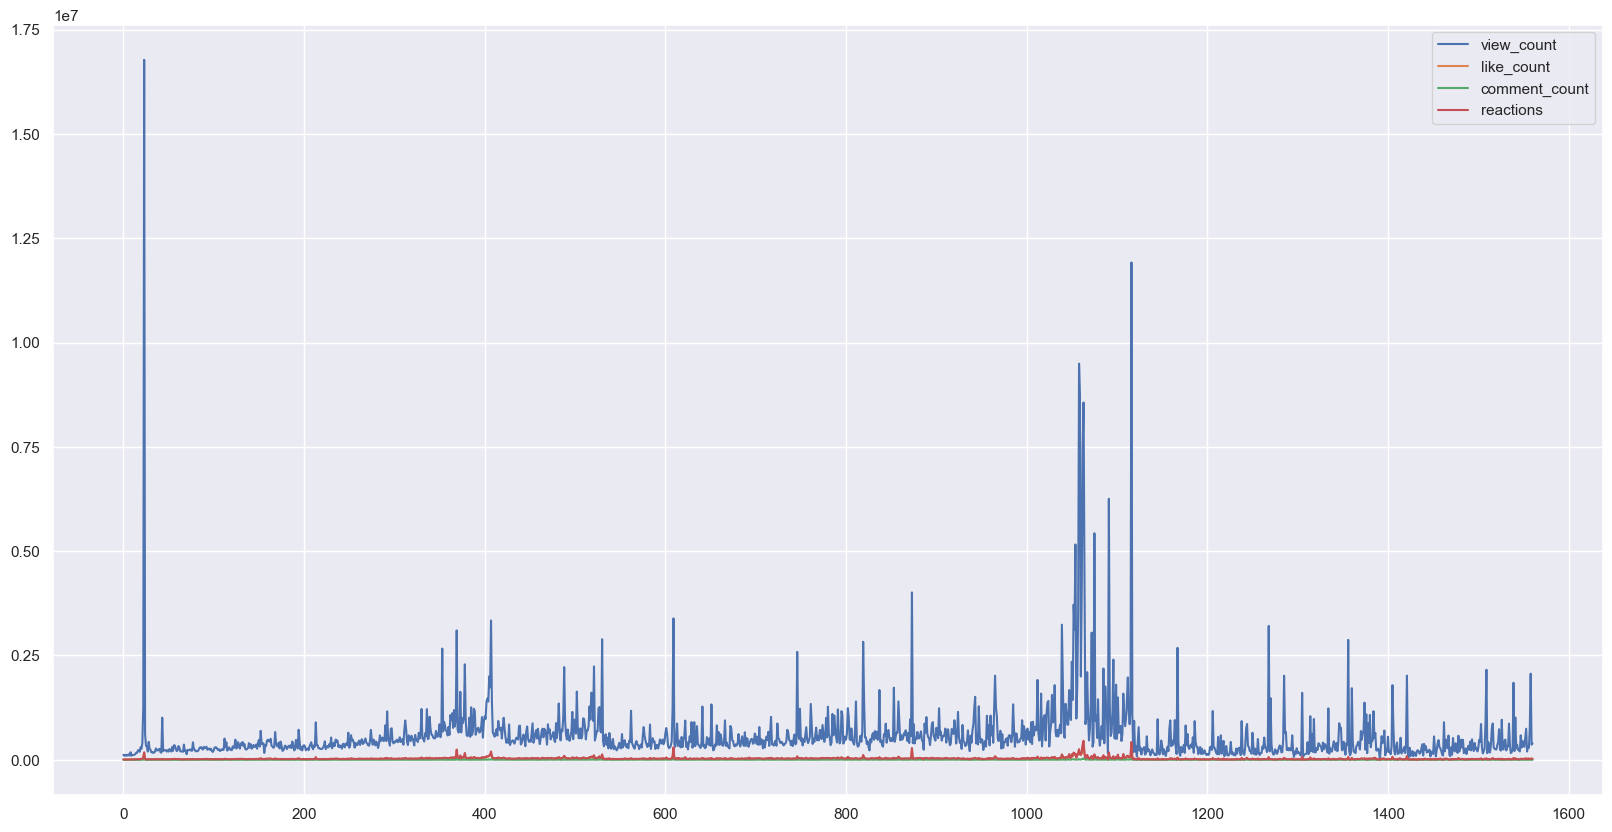

In [65]:
line = df.plot() 
line.plt()

In [52]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.head(40)

,title,published,view_count,like_count,comment_count,reactions
0,THE TWINS' BIRTHDAY PARTY! THEY TURNED 2!!!,2023-12-13T22:11:52Z,119133,6589,500,7589
1,Dealing with Tantrums & Meltdowns,2023-12-12T21:07:22Z,96680,5429,464,6357
2,FLYNN'S 5TH BIRTHDAY PARTY!,2023-12-11T20:35:55Z,119835,6707,605,7917
3,MARSHALLS HAUL! KIDS BIRTHDAY & CHRISTMAS PRES...,2023-12-10T22:00:34Z,96785,5979,309,6597
4,Christmas Lights & Home Renovation Plans,2023-12-08T22:10:18Z,117665,6215,387,6989
5,TIKTOK CHAMOY PICKLE TASTE TEST!,2023-12-07T22:12:15Z,104266,6395,471,7337
6,I GOT SO MANY COMMENTS LIKE THIS! 😩,2023-12-07T00:10:12Z,131868,7086,693,8472
7,TAYLOR SWIFT COPIED ME!,2023-12-05T21:54:18Z,101760,6278,566,7410
8,The Last Miranda Shows,2023-12-04T22:37:59Z,181924,8321,560,9441
9,I FINALLY FINISHED MY ROCKS & CRYSTALS!,2023-12-04T00:09:18Z,98611,6484,485,7454


<Axes: xlabel='title'>

/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128553 (\N{WEARY FACE}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128553 (\N{WEARY FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


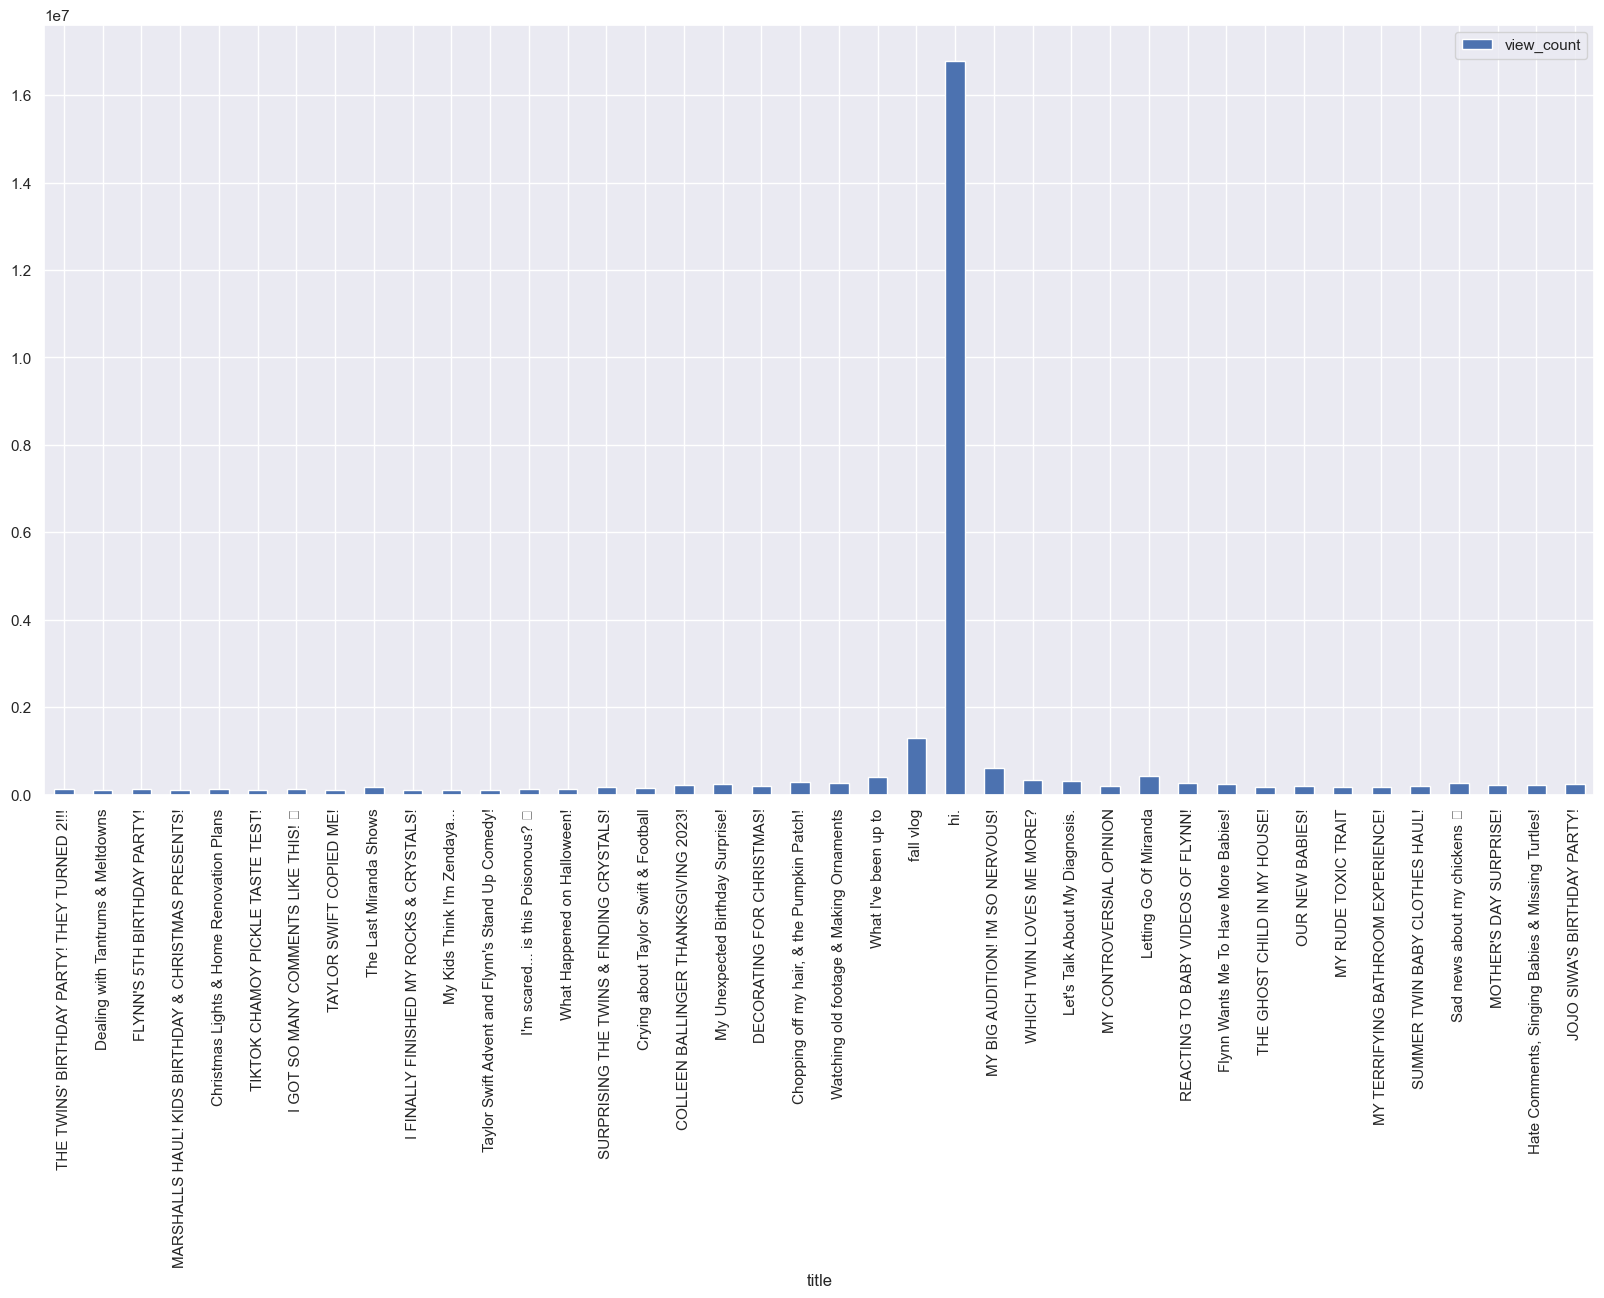

In [63]:
df.head(40).plot(x="title", y=["view_count"], kind="bar") 

This is the most recent snapshot of Colleen's channel right before and right after she was cancelled. On June 28th, she realeased a video, titled hi (row 23), where she apologized for the controversy that led to her cancelation. She then took a break, with her next video not being released until November later that year. In the videos leading up to her cancelation (rows 39-24) she was consistantly gaining hundreds of thoudsands of views, and over 10k reactions coming from comments and likes. Her apology video, where she famously sang while playing ukulele, gained 16 million views. Over 13 thousand people commented and over one hundred thousand people liked the video. Once she returened (rows 22-0), her first video was her last to break the million view threshold, however, her channel still pull 100,000+ views for nearly every video, however viewers are less reactive to her channel.

In [51]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.tail(20)

,title,published,view_count,like_count,comment_count,reactions
1541,MY DADDY SURPRISED ME!,2015-03-31T02:59:13Z,1014879,30953,3134,37221
1542,THE BEST DAY OF MY LIFE!,2015-03-29T23:19:53Z,276562,14095,723,15541
1543,BIKINI TIME WITH MY GIRLS!,2015-03-29T06:36:16Z,361733,15008,845,16698
1544,INSIDE MY JOURNAL!,2015-03-26T05:38:50Z,239449,12988,542,14072
1545,BACK STAGE!,2015-03-25T12:27:38Z,230558,12841,478,13797
1546,I'M THE SEXIEST WOMAN!,2015-03-24T04:03:09Z,200598,12311,394,13099
1547,I FAINTED ON THE PLANE!,2015-03-24T01:15:56Z,586195,19769,1252,22273
1548,QUITTING VLOGGING,2015-03-23T00:10:06Z,294734,17614,4884,27382
1549,I DON'T KNOW WHAT TO TITLE THIS VIDEO BUT I'M ...,2015-03-21T21:28:48Z,451205,17823,1288,20399
1550,I'm A JERK,2015-03-09T23:11:45Z,329903,18342,799,19940


<Axes: xlabel='title'>

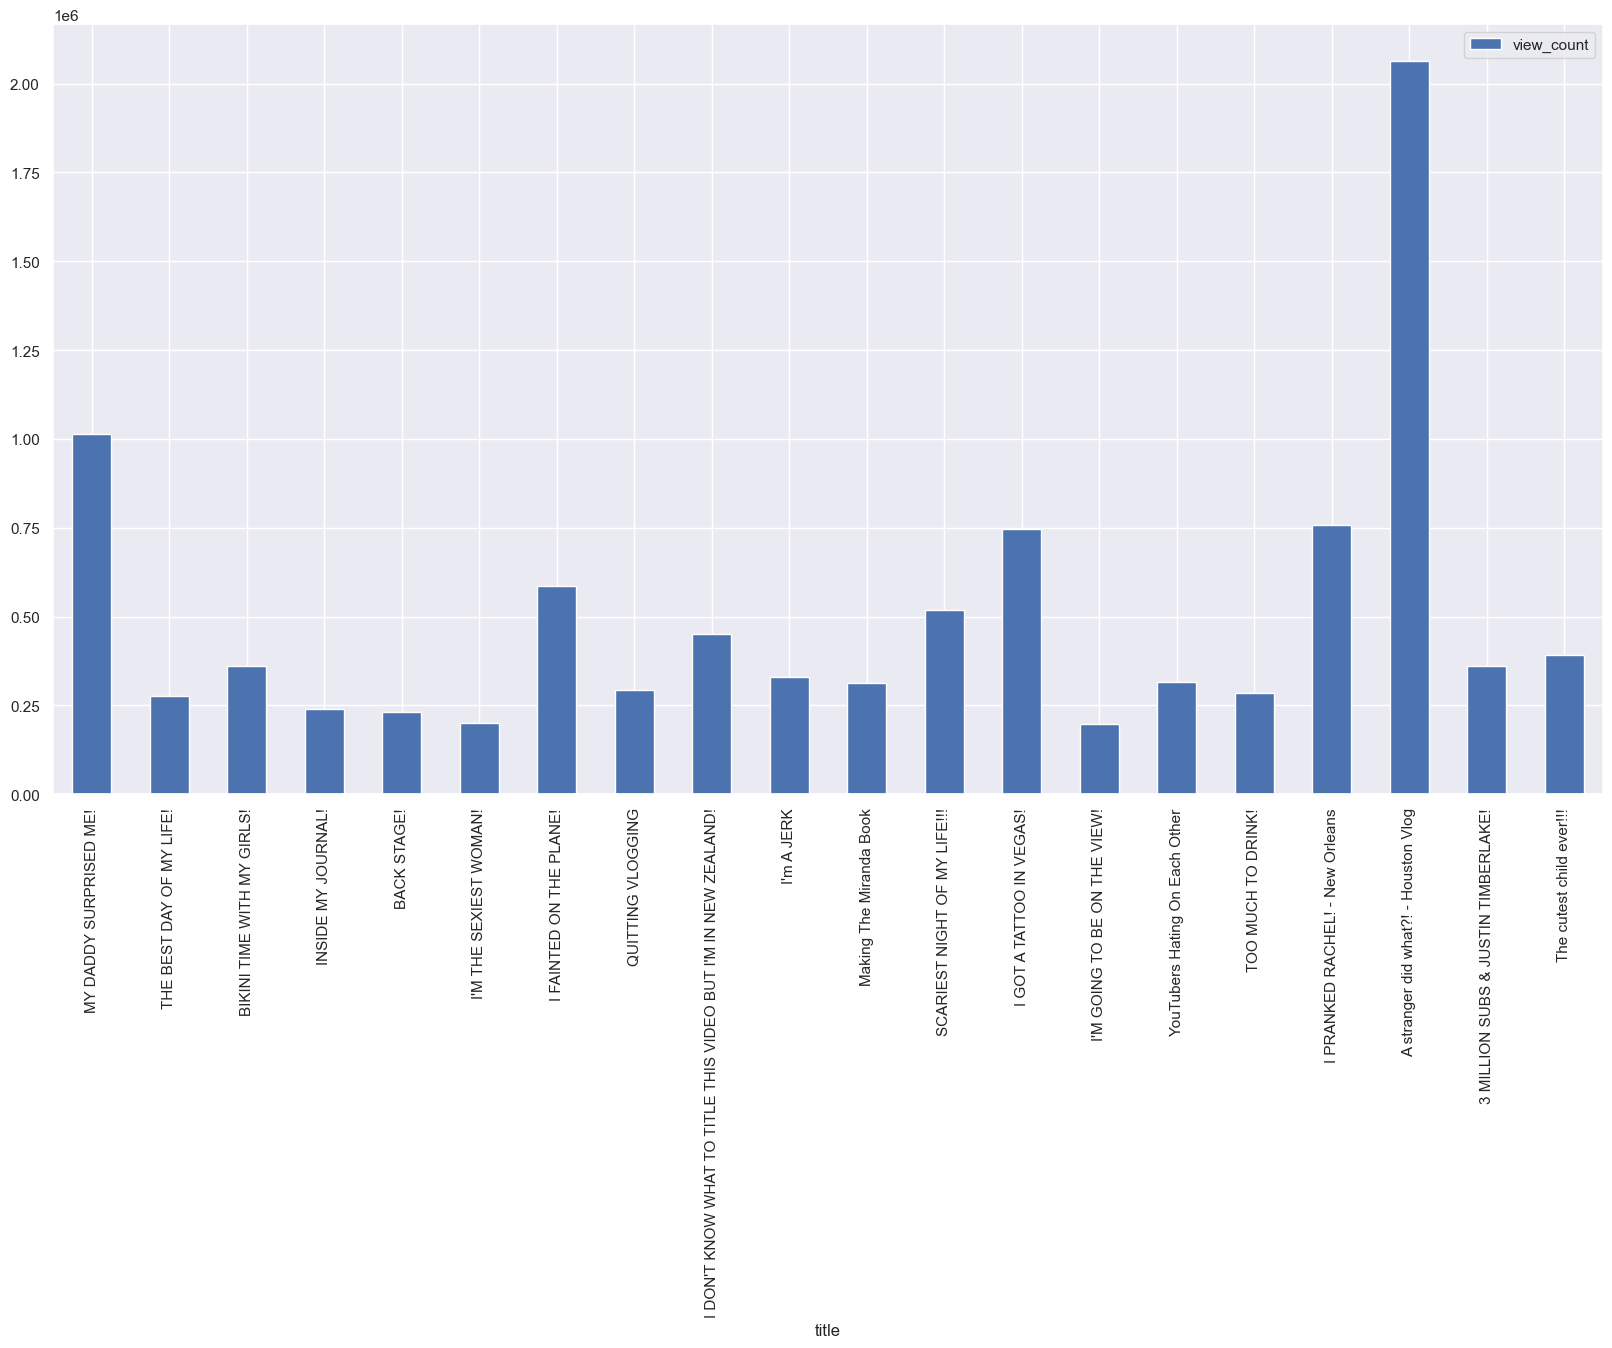

In [61]:
df.tail(20).plot(x="title", y=["view_count"], kind="bar") 

These are the 20 oldest uploads of Colleen's Channel. She gets around 10k likes per post. Her view count per video is steady in the low hundred thousands, with a couple of videos spiking at over a million of views. Hundreds  sometimes thousands of people comment on her posts, making her engagement really strong for her audience size. Although her cannel was new, she was consistantantly pulling more views than she is currently.

# Logan Paul

Logan Paul initially rose to fame, with several videos going viral. Earlier in his career, a mucis vidoe of his received hundreds of millions of views. In Janurary of 2018, Logan Paul released an apology video for his conduct while on a trip to Japan (row 275). Before the controversy, Logan was receiving a nearly a million views per video, with a few videos gaining over a million views. After the controversy, he was still bringing in several hundred thousand views per video, still with some going viral. Although he doesn't post as much anymore, his newer videos continue to bring in millions of views. 

In [70]:
logan_id = "UCp0hYYBW6IMayGgR-WeoCvQ"

In [72]:
def get_channel_stats(youtube, logan_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=logan_id
    )
    response = request.execute()
    
    return response['items']

In [73]:
channel_stats = get_channel_stats(youtube, logan_id)

In [74]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UUG8rbF3g2AMX70yOd8vqIZg'

In [75]:
video_list = get_video_list(youtube, playlist_id)

In [76]:
def get_video_details(youtube, video_list):
    stats_list=[]

    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict= dict(title=title, published=published, view_count=view_count, like_count=like_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [77]:
video_data = get_video_details(youtube, video_list)

AttributeError: 'Axes' object has no attribute 'plt'

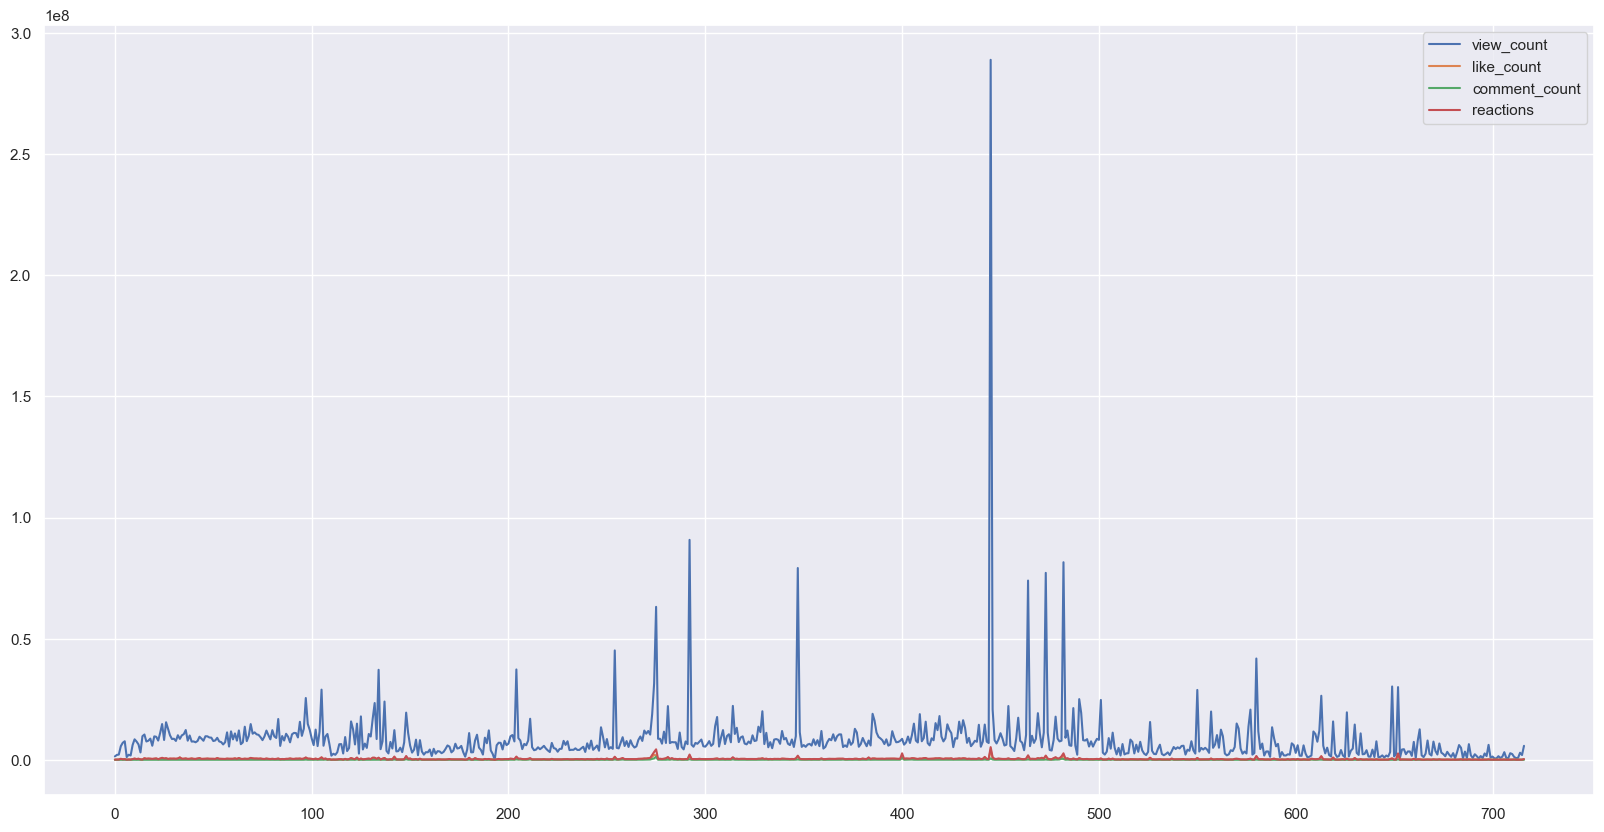

In [79]:
line = df.plot() 
line.plt()

In [87]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df[250:290]

,title,published,view_count,like_count,comment_count,reactions
250,We lost a Logangster...,2018-03-16T20:00:09Z,8574761,405148,63455,532058
251,I'm a failure.,2018-03-15T20:08:06Z,4500145,220765,20846,262457
252,HAND DELIVERING MAVERICK MERCH TO KSI’S HOUSE!,2018-03-14T00:03:33Z,5215975,217284,27078,271440
253,REVEALING OUR DEEPEST SECRETS...,2018-03-12T18:53:24Z,4537862,187886,12865,213616
254,Logan Paul - THE NUMBER SONG (Official Music V...,2018-03-11T19:14:28Z,45147601,1004822,136954,1278730
255,THE NEW ROOMMATE HAS BEEN CHOSEN!,2018-03-11T15:59:40Z,4931763,221437,16704,254845
256,PICKING OUR NEW ROOMMATE!,2018-03-10T18:39:54Z,4719860,204016,15868,235752
257,Saying Goodbye...,2018-03-09T19:59:40Z,7080033,348298,53448,455194
258,AM I BOXING KSI?!,2018-02-24T19:43:10Z,9332032,499320,126403,752126
259,Moving forward...,2018-02-20T23:00:27Z,5706112,244332,29964,304260


<Axes: xlabel='title'>

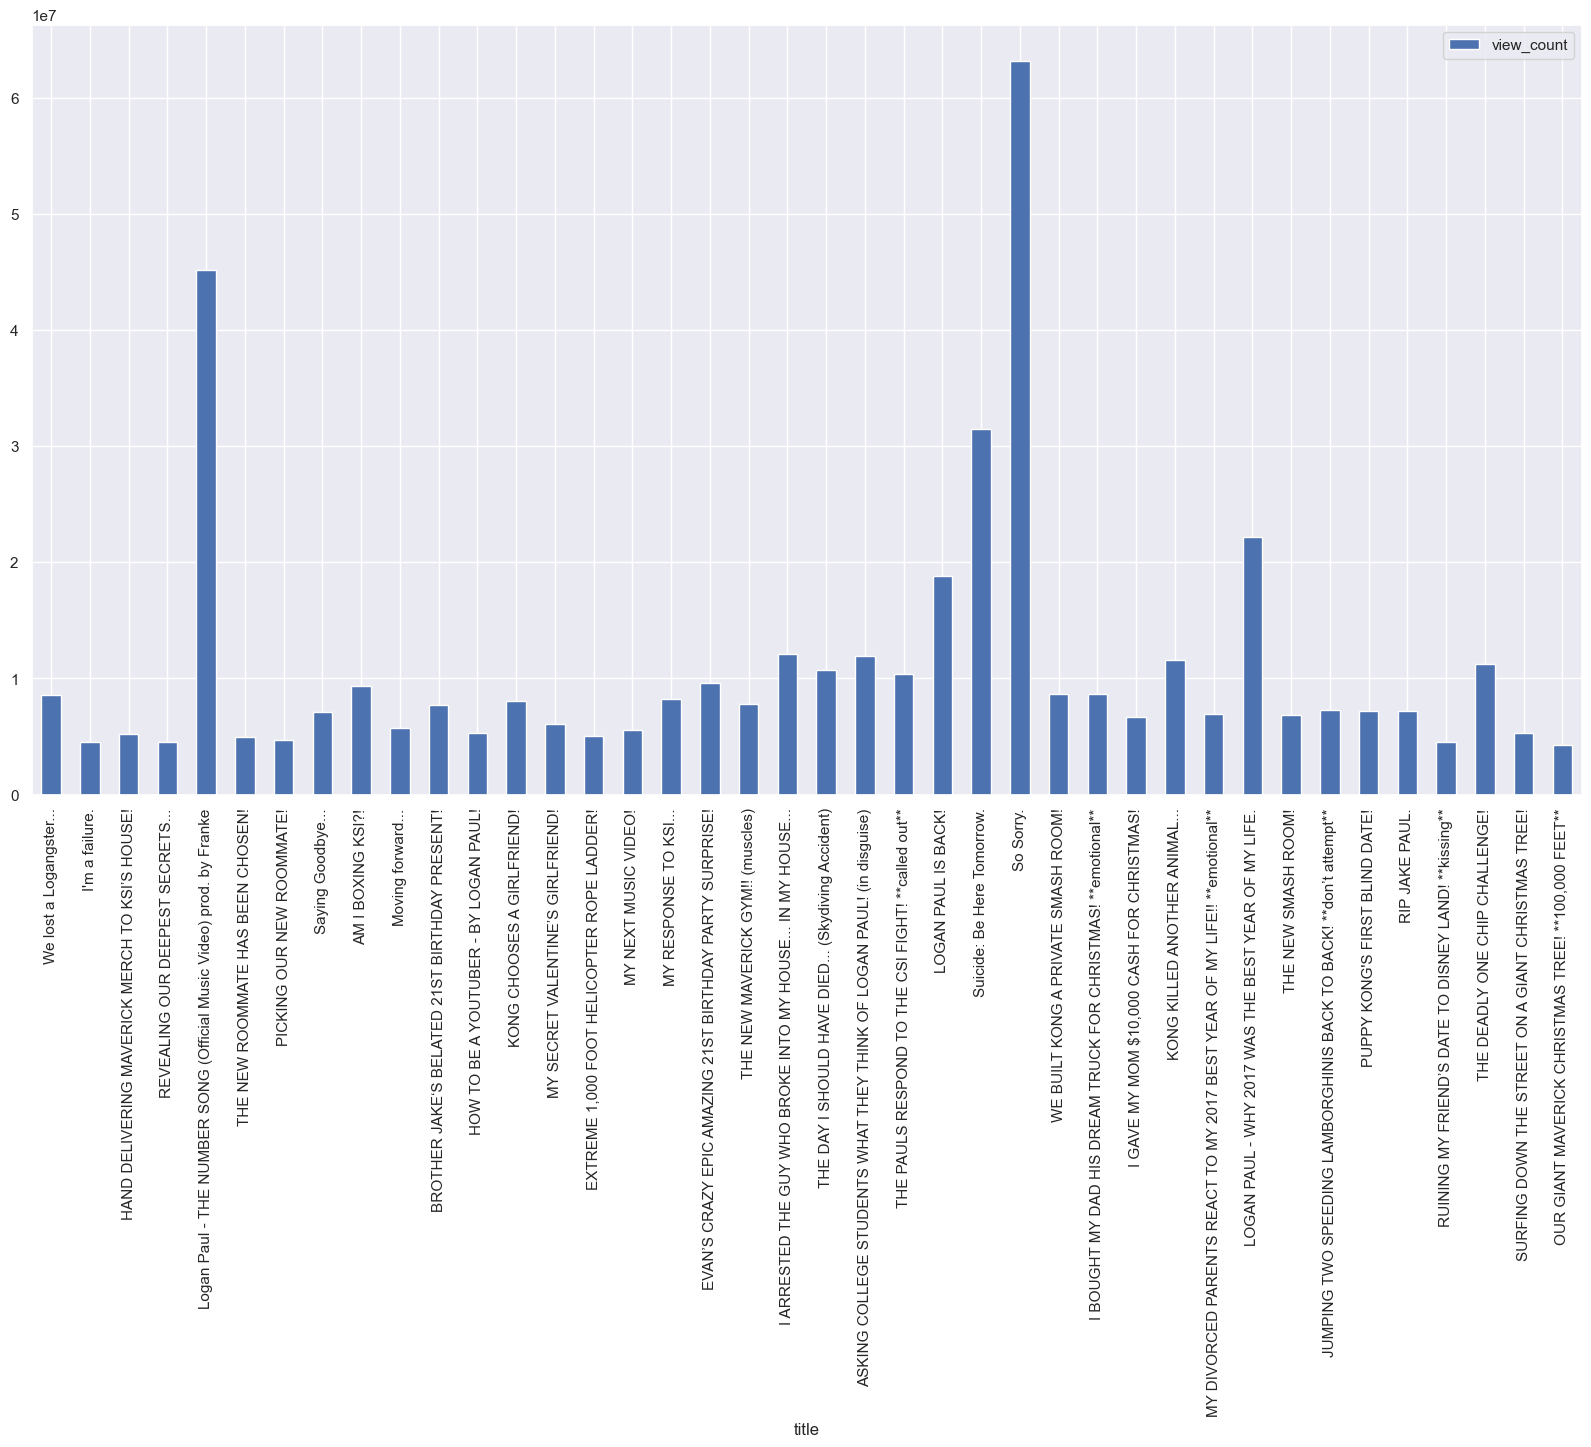

In [88]:
df[250:290].plot(x="title", y=["view_count"], kind="bar") 

In [81]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.tail(20)

,title,published,view_count,like_count,comment_count,reactions
697,HOW TO WORK OUT UNDERWATER!,2016-10-04T20:29:13Z,1537992,53529,2525,58579
698,I FOUGHT WITH KEVIN HART!,2016-10-03T23:05:38Z,6166632,157551,6072,169695
699,ILLEGALLY CLIMBED TO THE HIGHEST POINT IN HAWAII!,2016-10-02T21:41:55Z,921309,47350,1908,51166
700,I CHANGED?!,2016-10-01T00:25:40Z,1344952,52270,2827,57924
701,MARSHMALLOW CHALLENGE IN NEW YORK!,2016-09-28T19:10:53Z,584889,31981,938,33857
702,VLOGGING IS HARD!!!,2016-09-27T18:24:00Z,574332,34104,1120,36344
703,THE PAUL BOYS IN SAN FRANCISCO!,2016-09-26T23:00:01Z,1494091,49709,1771,53251
704,I LEFT MY BAGS ON THE PLANE!,2016-09-25T22:08:48Z,735172,34428,953,36334
705,THE DATE + IPHONE 7 GIVEAWAY WINNERS!,2016-09-25T02:00:40Z,1290602,55874,2812,61498
706,GOT HER NUMBER WITHOUT TALKING!,2016-09-23T08:04:01Z,3149707,91414,3678,98770


<Axes: xlabel='title'>

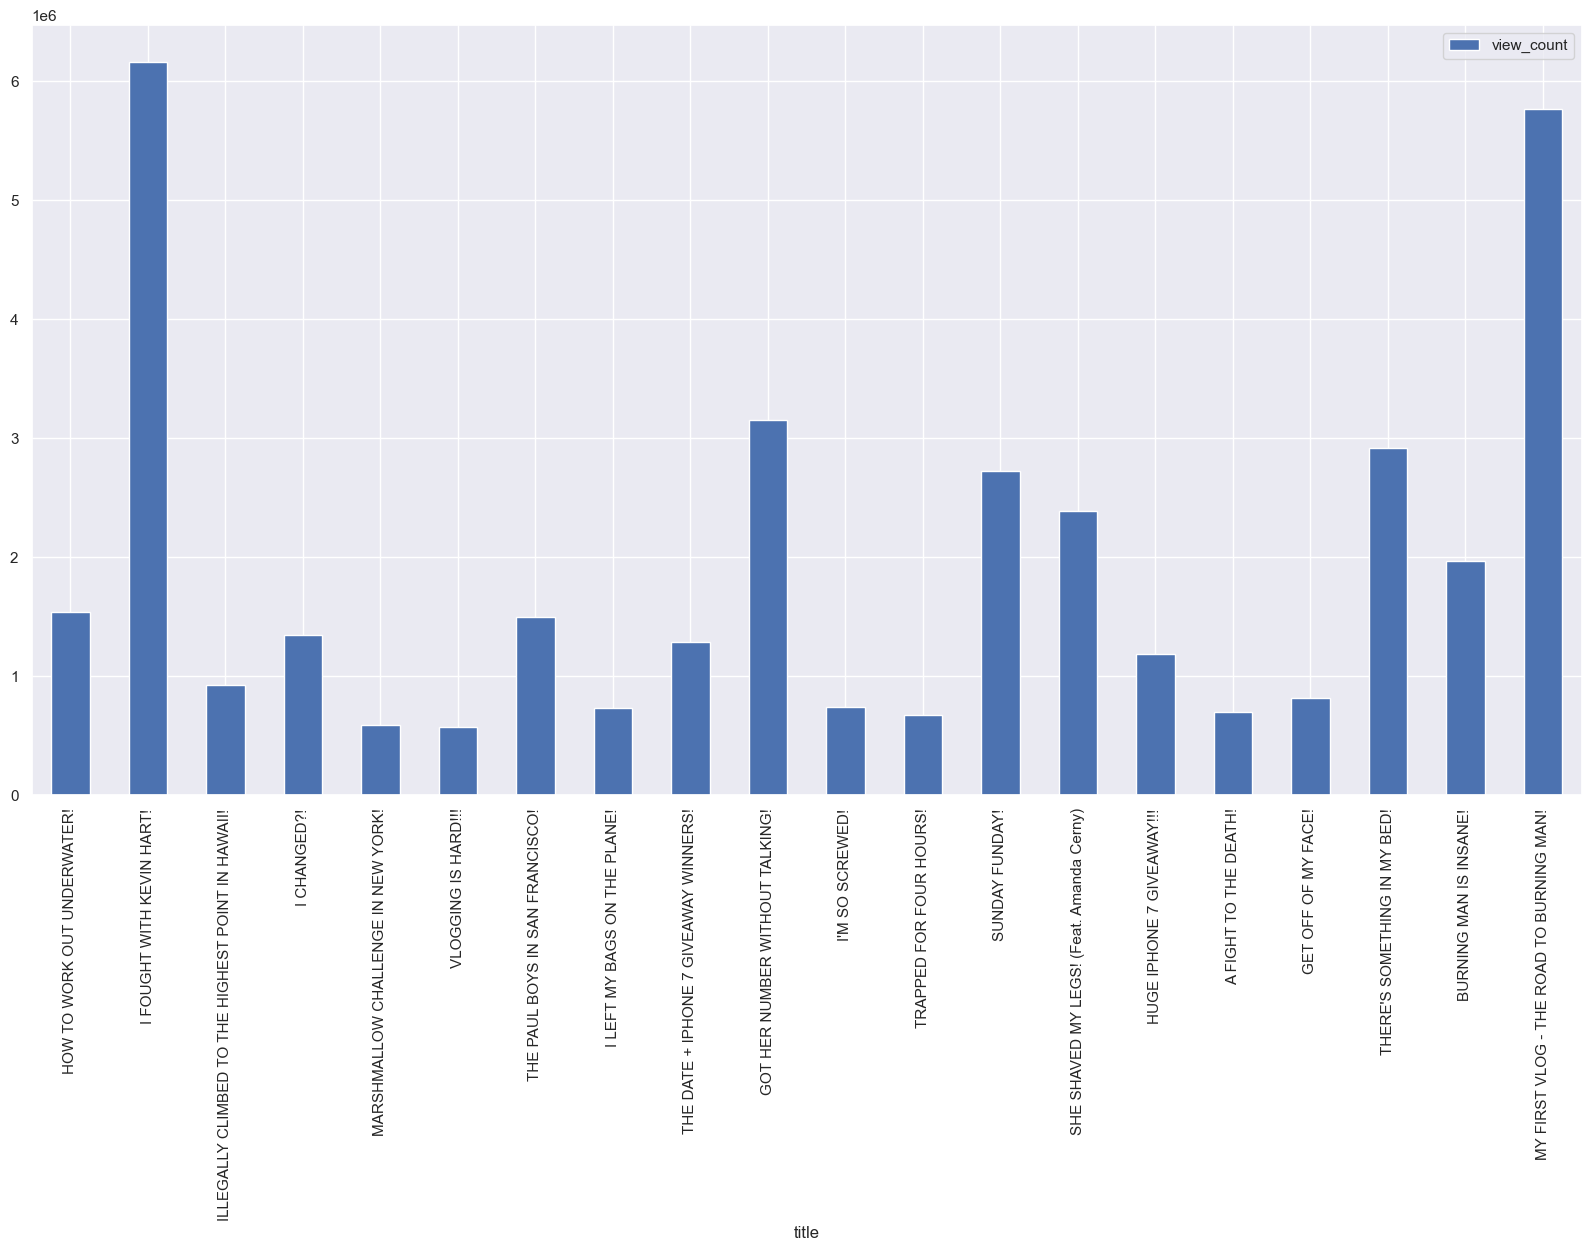

In [82]:
df.tail(20).plot(x="title", y=["view_count"], kind="bar") 

# Will Smith

Will Smith has had a harder time recovering from his controversy. Before the 2022 Oscars, his channel was bring in hundreds of thousands and sometimes millions of viewers. On November 8th, he released his apology video. (Row 20) After the controversy, his videos bring in just tens of thousands of views, small in comparison to his previous audience reach.

In [89]:
will_id = "UCKuHFYu3smtrl2AwwMOXOlg"

In [90]:
def get_channel_stats(youtube, will_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=will_id
    )
    response = request.execute()
    
    return response['items']

In [91]:
channel_stats = get_channel_stats(youtube, will_id)

In [92]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UUKuHFYu3smtrl2AwwMOXOlg'

In [93]:
video_list = get_video_list(youtube, playlist_id)

In [94]:
def get_video_details(youtube, video_list):
    stats_list=[]

    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict= dict(title=title, published=published, view_count=view_count, like_count=like_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [95]:
video_data = get_video_details(youtube, video_list)

AttributeError: 'Axes' object has no attribute 'plt'

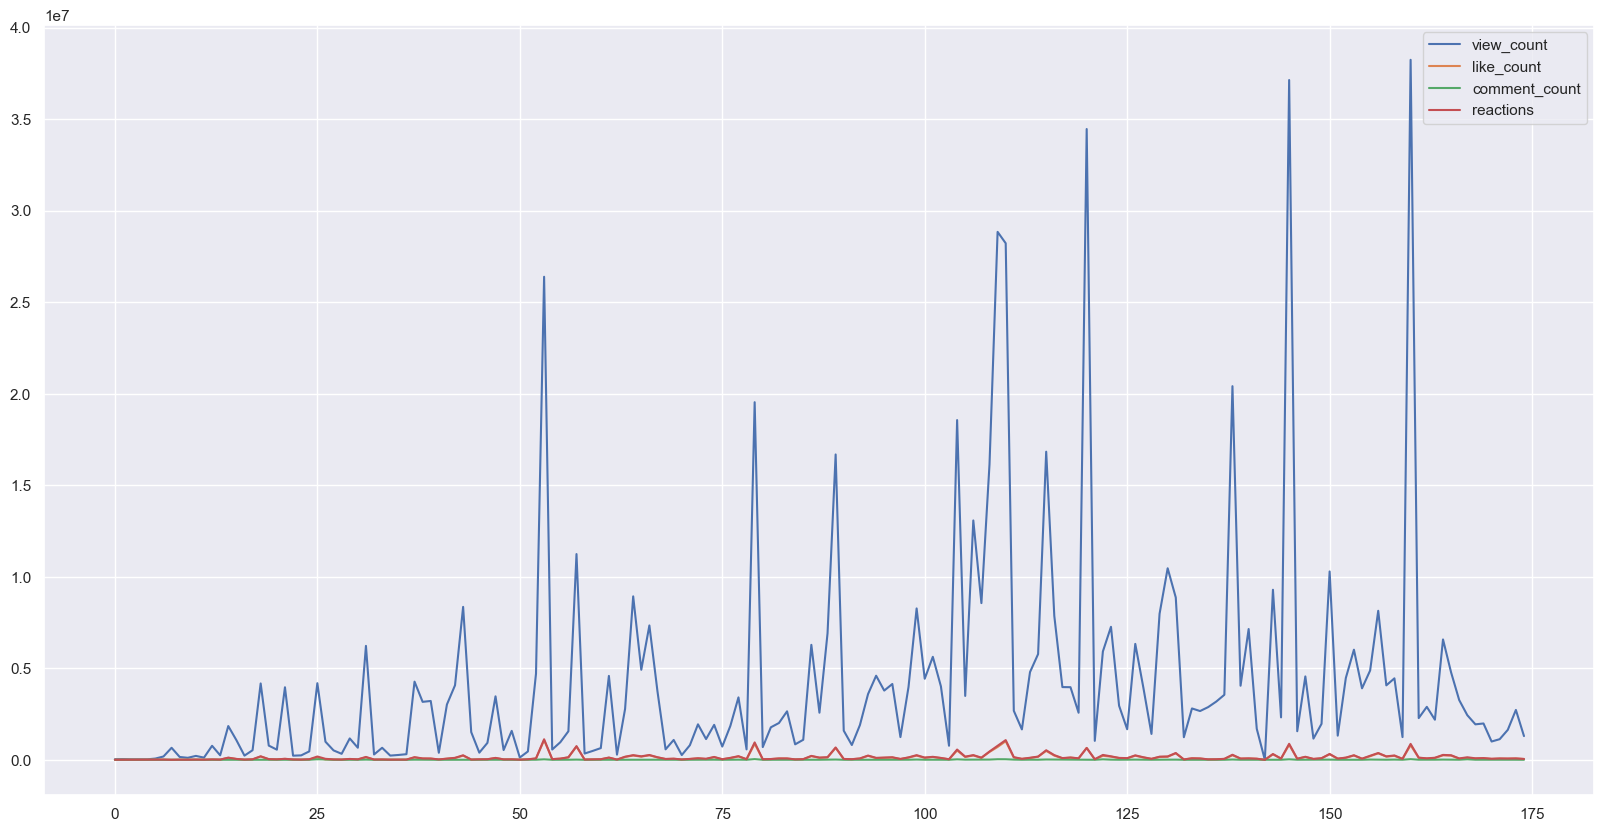

In [98]:
line = df.plot() 
line.plt()

In [97]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.head(40)

,title,published,view_count,like_count,comment_count,reactions
0,Performing with DJ Jazzy Jeff Again for Hip Ho...,2023-12-15T19:33:52Z,30446,2699,196,3091
1,HAPPY BORN DAY FOXX!!,2023-12-14T03:10:51Z,37650,4039,124,4287
2,It’s All Love. ❤️,2023-12-13T00:58:47Z,27067,2460,88,2636
3,Back at it with my guy @djjazzyjeff-This feeli...,2023-12-13T00:51:17Z,29845,2091,98,2287
4,I ain’t know NUFFIN! Haha. Tryna sound all con...,2023-12-12T23:36:29Z,26654,2040,55,2150
5,I know some of y’all were sayin’ HUH??🤔. Now U...,2023-12-07T01:08:32Z,67889,5647,332,6311
6,Episode 1 of My New Podcast: Class of ‘88 | DJ...,2023-10-26T19:22:40Z,182004,10472,164,10800
7,OFFICIAL STATEMENT,2023-10-17T20:12:39Z,656105,0,230,460
8,my bad!!,2023-07-24T17:33:10Z,154742,6379,237,6853
9,It’s GIVEAWAY time y’all! Check the descriptio...,2023-07-15T14:10:41Z,109552,4529,228,4985


<Axes: xlabel='title'>

/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128249 (\N{VIDEO CAMERA}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8288 (\N{WORD JOINER}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10084 

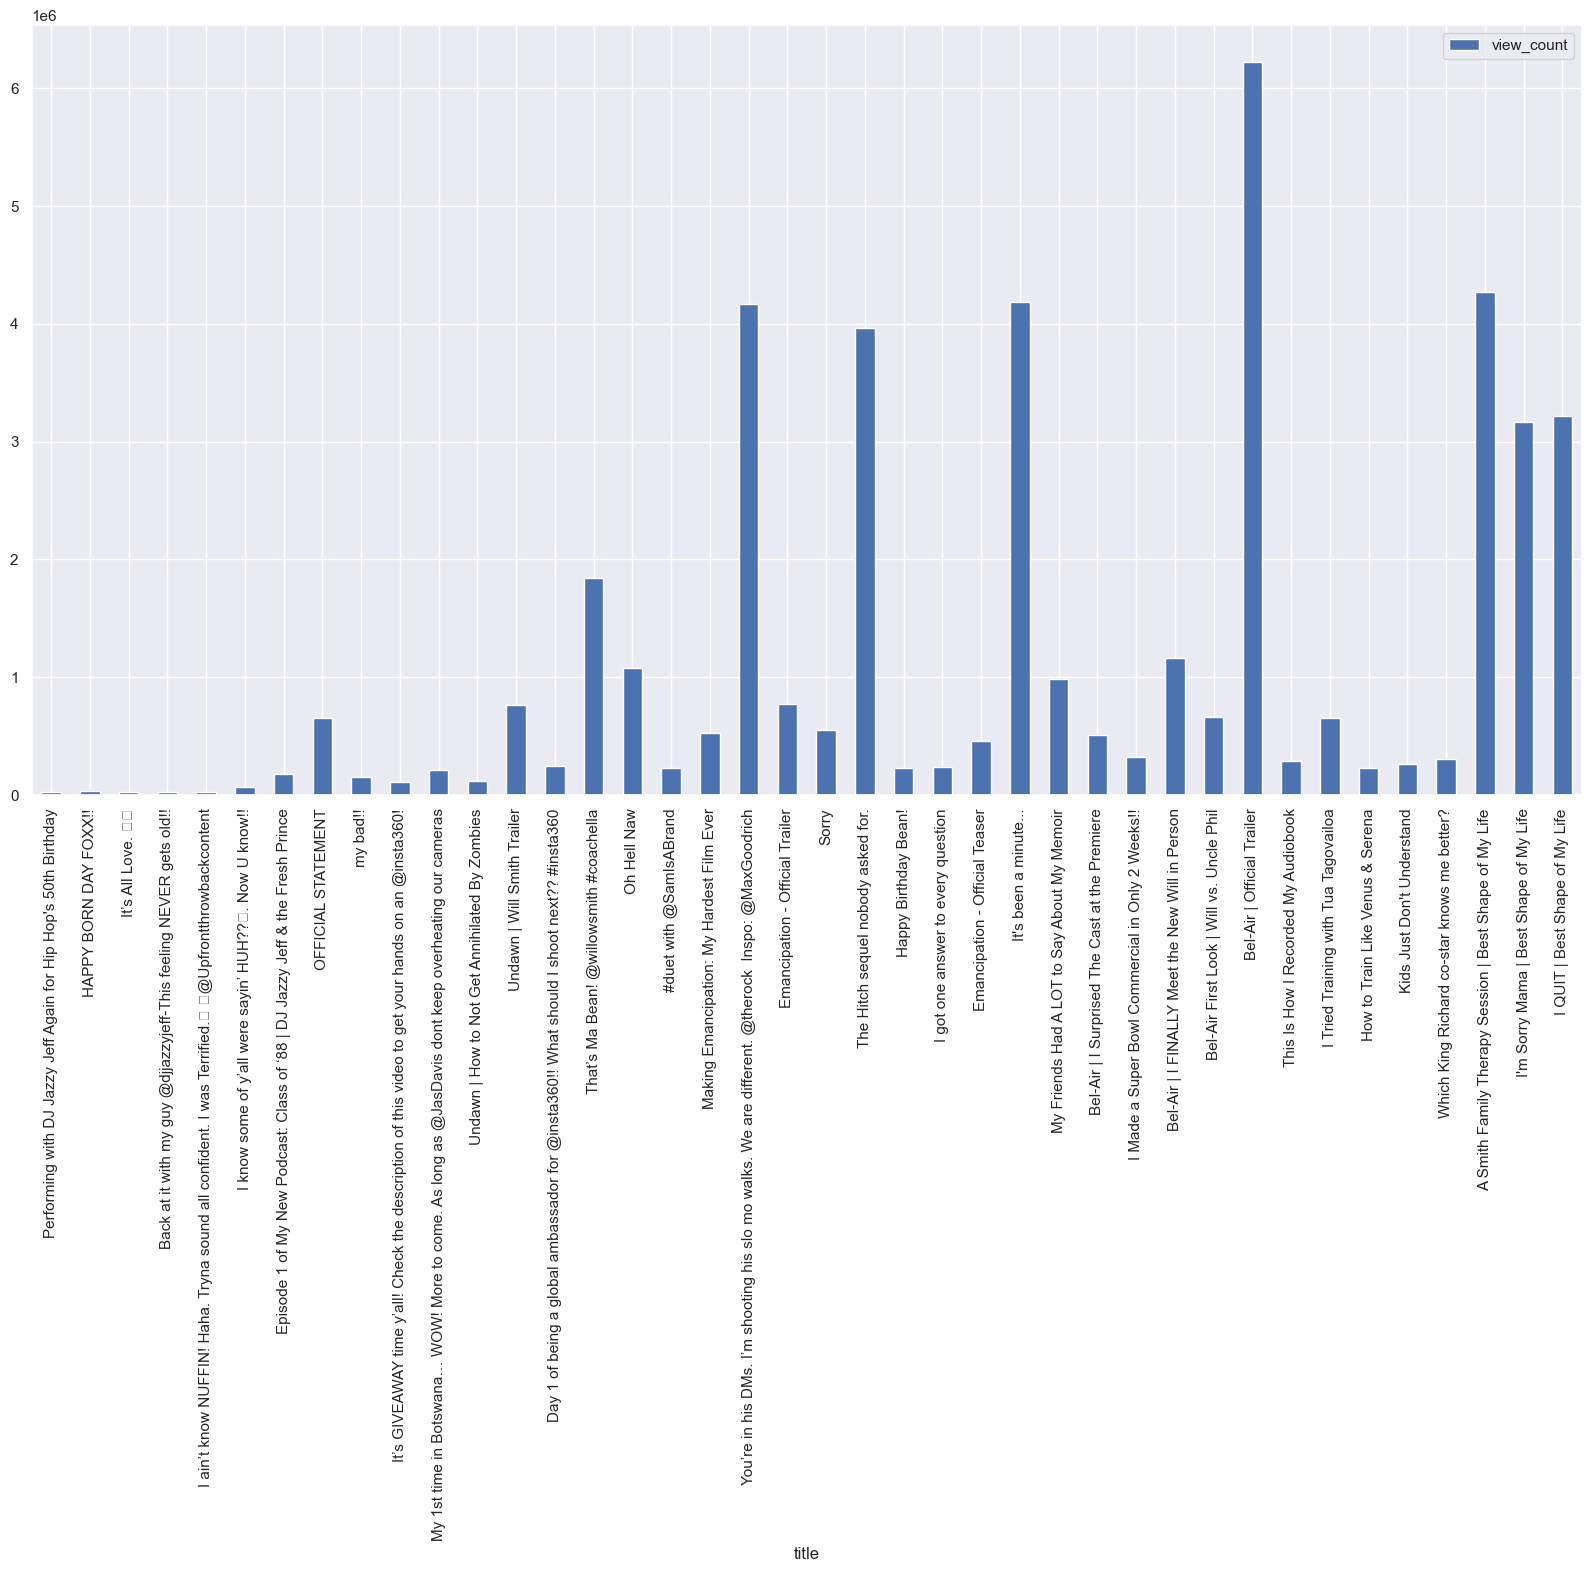

In [100]:
df.head(40).plot(x="title", y=["view_count"], kind="bar") 

In [101]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.tail(20)

,title,published,view_count,like_count,comment_count,reactions
155,Messing around in the studio…,2018-05-23T18:28:58Z,4878076,194474,13217,220908
156,How I Became The Fresh Prince of Bel-Air | STO...,2018-05-10T16:08:58Z,8140593,353291,8911,371113
157,What Skydiving Taught Me About Fear | STORYTIME,2018-04-26T16:38:19Z,4067306,177317,4679,186675
158,That Time I Met Michael Jackson | STORYTIME,2018-04-18T16:00:03Z,4450345,215422,11060,237542
159,Will Smith calls THE SPACE STATION!!,2018-04-13T21:50:31Z,1240805,47765,2943,53651
160,Will Smith Tries Online Dating,2018-03-29T18:10:37Z,38239195,797020,35816,868652
161,CELEBRATING 1 MILLION SUBSCRIBERS AT FALLON!!,2018-03-23T21:28:09Z,2278631,108415,4997,118409
162,Will Smith Channel Trailer,2018-03-23T02:06:16Z,2892840,72268,3257,78782
163,Painful Awakening (Dude Punched Me... HARD!) |...,2018-03-15T16:41:30Z,2190181,100415,5936,112287
164,Facing My BIGGEST Fear,2018-03-08T17:48:54Z,6576212,244482,11214,266910


<Axes: xlabel='title'>

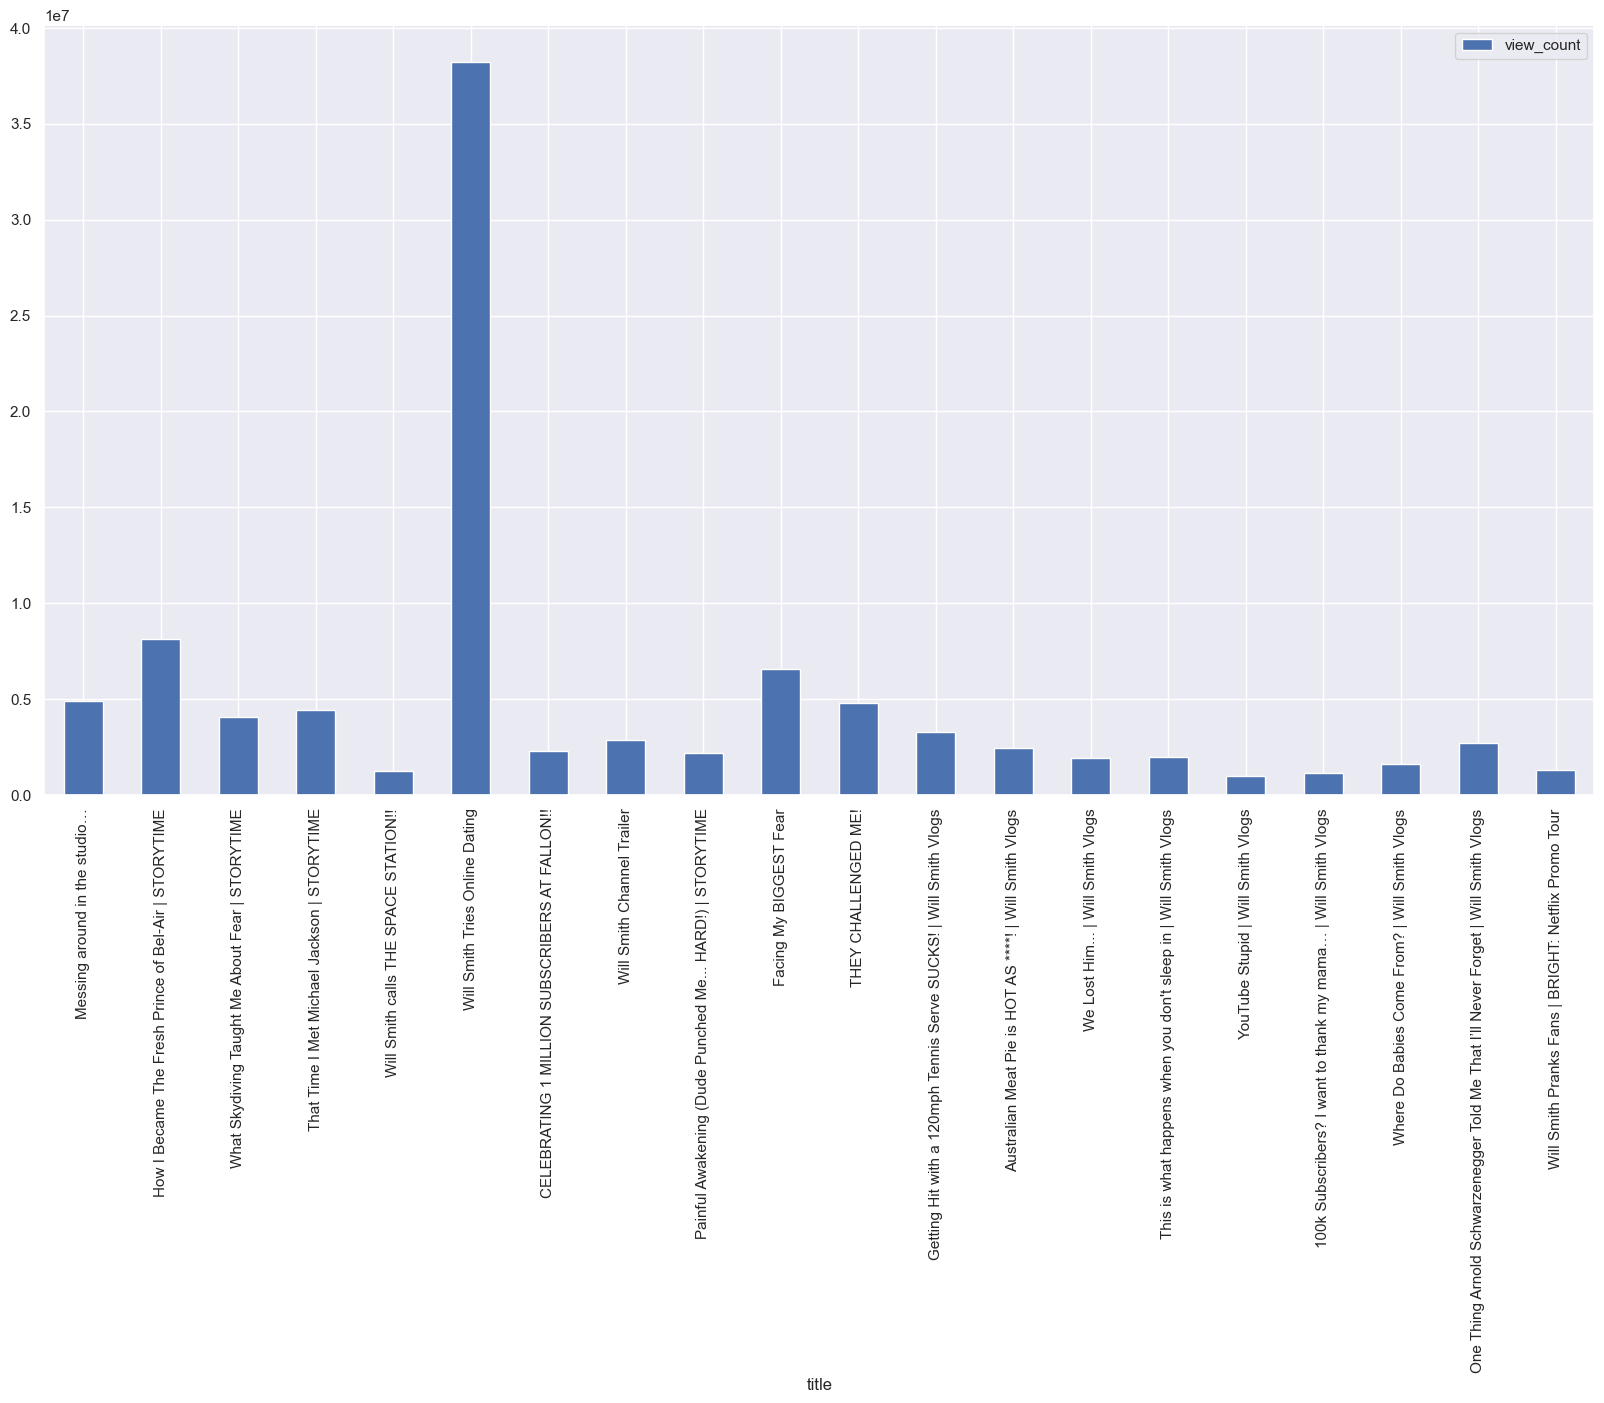

In [102]:
df.tail(20).plot(x="title", y=["view_count"], kind="bar") 

# PewDiePie

Although his channel started off small, PewDiePie at one time held the title for the most subscribed Youtuber. On September 12, he released his apology video. Both before and after the controversy, PewDiePie continued to bring in million of views per video. Even with his uploads today, he continues to bring in millions ov viewers per video.

In [103]:
pew_id = "UC-lHJZR3Gqxm24_Vd_AJ5Yw"

In [104]:
def get_channel_stats(youtube, pew_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=pew_id
    )
    response = request.execute()
    
    return response['items']

In [105]:
channel_stats = get_channel_stats(youtube, pew_id)

In [106]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UU-lHJZR3Gqxm24_Vd_AJ5Yw'

In [107]:
video_list = get_video_list(youtube, playlist_id)

In [108]:
def get_video_details(youtube, video_list):
    stats_list=[]

    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict= dict(title=title, published=published, view_count=view_count, like_count=like_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [109]:
video_data = get_video_details(youtube, video_list)

AttributeError: 'Axes' object has no attribute 'plt'

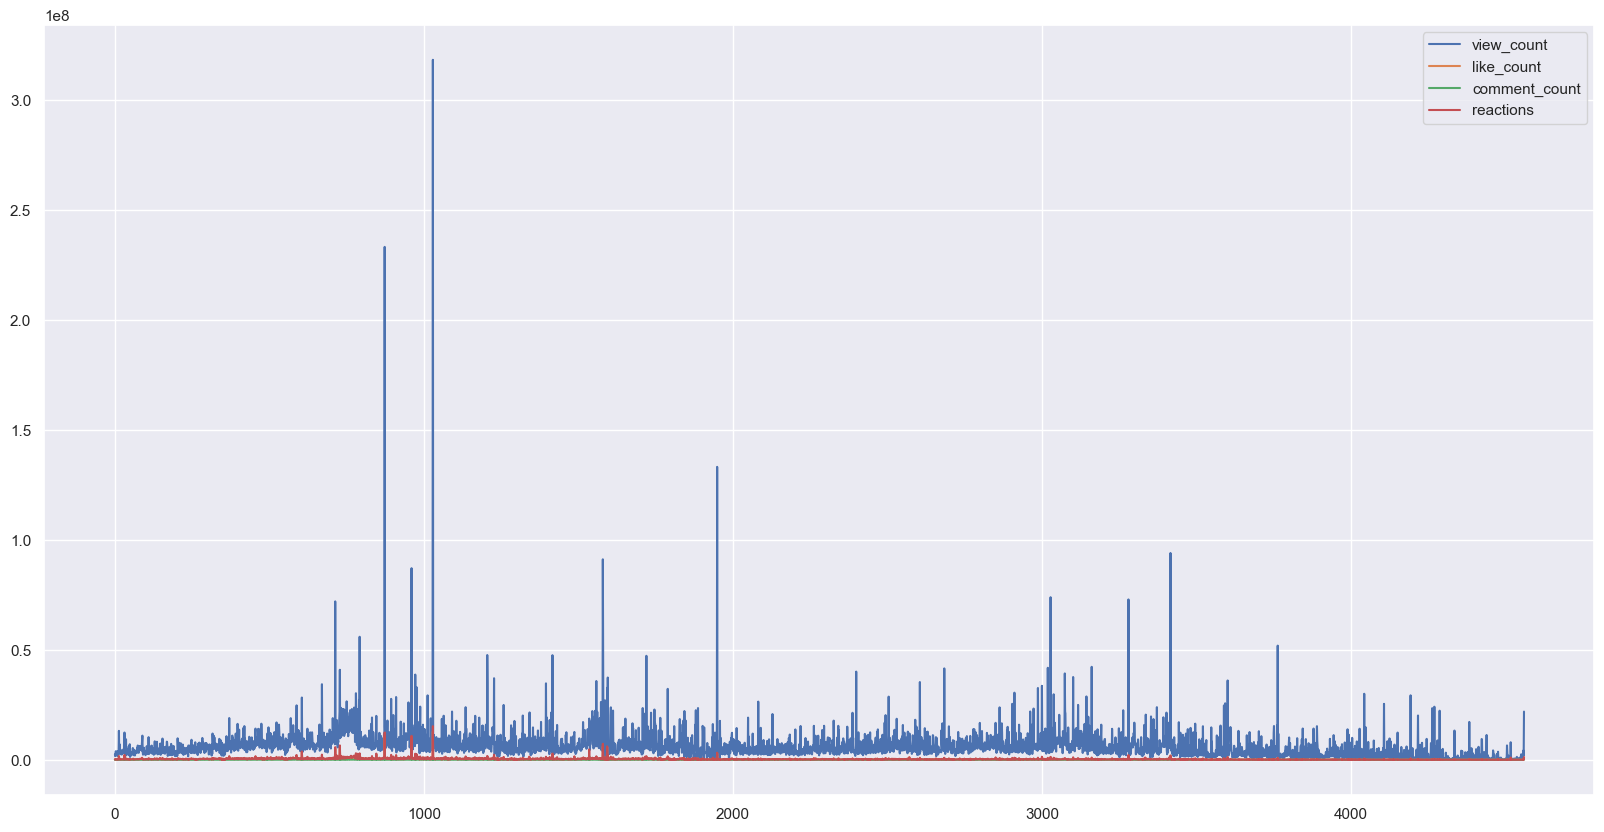

In [111]:
line = df.plot() 
line.plt()

In [117]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df[1320:1360]

,title,published,view_count,like_count,comment_count,reactions
1320,HOW TO: MAKE SWEDISH MEATBALLS,2017-10-08T18:09:09Z,20144909,820458,52098,924654
1321,PLEASE DONT FEEL BAD WATCHING THIS GAMEPLAY,2017-10-07T16:34:35Z,7839926,287477,14525,316527
1322,NEW MERCH STREAM [360 p],2017-10-05T18:00:15Z,1492544,56144,4268,64680
1323,💢 I M P O S S I B L E ? ! ? ! 😡,2017-10-05T16:59:11Z,5048703,209715,8803,227321
1324,CHRISTIAN CHANNEL. - LWIAY - #0008,2017-10-04T17:10:11Z,5635031,332203,15095,362393
1325,ABSOLUTELY DESTROYED VIDEO -- YLYL #0006,2017-10-03T16:47:23Z,7993913,307826,16388,340602
1326,[Cuphead] this game is a little hard,2017-10-02T16:25:44Z,11570968,420873,17119,455111
1327,RETURN TO SLENDER,2017-09-29T16:36:52Z,4178325,211563,15186,241935
1328,I f************ LOVE Science!,2017-09-28T15:49:38Z,3650270,200931,13870,228671
1329,I've never given up like this..,2017-09-27T16:29:30Z,5519315,214021,9068,232157


<Axes: xlabel='title'>

/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127852 (\N{CANDY}) missing from current font.
  func(*args, **kwargs)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaylen/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127852 (\N{CANDY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


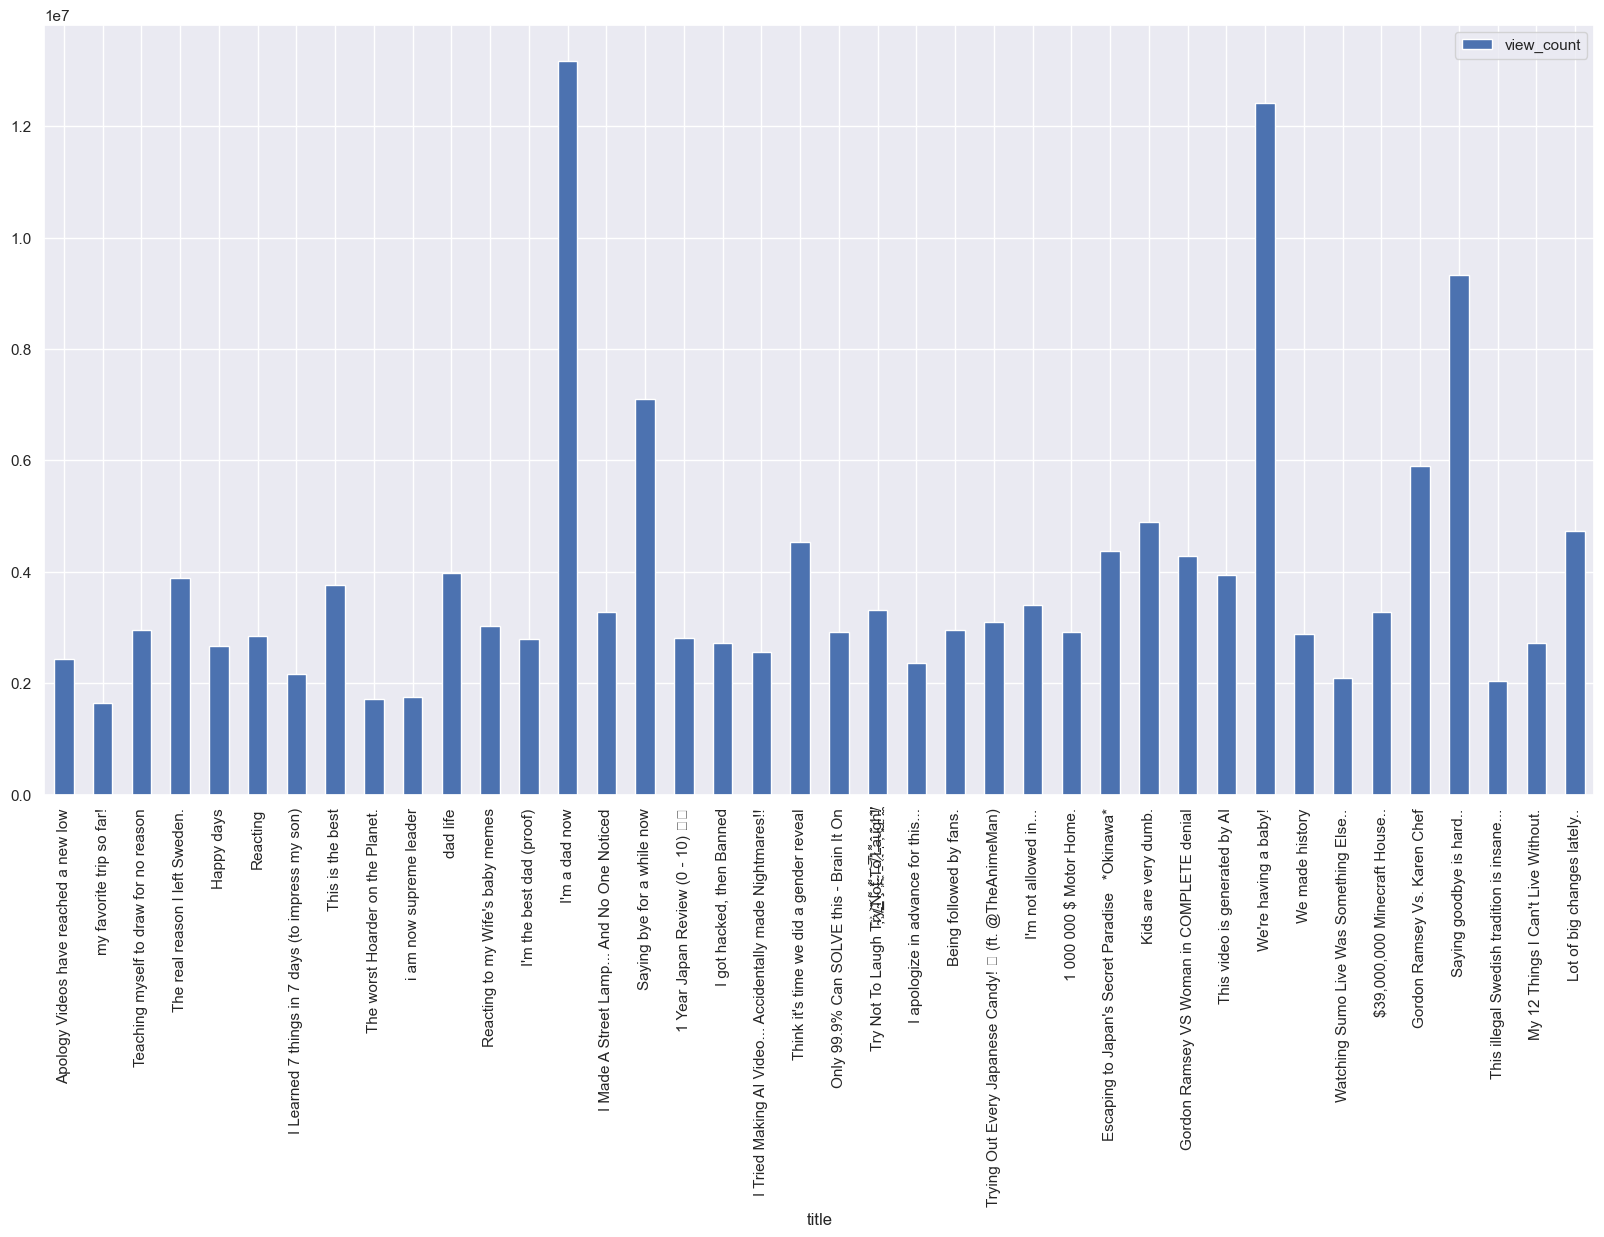

In [118]:
df.head(40).plot(x="title", y=["view_count"], kind="bar") 

In [119]:
df=pd.DataFrame(video_data)
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
df["reactions"] = df["like_count"]  + df["comment_count"] + df["comment_count"]
df.tail(20)

,title,published,view_count,like_count,comment_count,reactions
4541,Amnesia: Playthrough Part: 12 - GUEST ROOM ISN...,2011-01-05T21:15:12Z,648652,10866,1328,13522
4542,Amnesia: Playthrough Part: 11 - BREAD FIRST - ...,2011-01-04T20:02:12Z,618886,11413,1761,14935
4543,Amnesia: Playthrough Part: 10 - So dark ;_;,2011-01-04T06:09:37Z,711471,12154,1634,15422
4544,"Amnesia: Playthrough Part: 9 - Scariest, Darke...",2011-01-04T03:24:36Z,708549,12489,1132,14753
4545,Amnesia: Playthrough Part: 8 - THERE'S SOMETHI...,2011-01-03T01:48:29Z,774527,13190,1774,16738
4546,Amnesia: Playthrough Part: 7 - SCARY MONSTER I...,2011-01-02T01:26:10Z,860892,13563,1550,16663
4547,Amnesia: Playthrough Part: 6 - Chemistry and shit,2011-01-01T04:05:34Z,856079,14107,1333,16773
4548,Amnesia: Playthrough Part: 5 - NOPE,2010-12-31T05:37:36Z,1051493,16124,1976,20076
4549,Amnesia: Playthrough Part: 4 - The bro is not ...,2010-12-30T11:12:50Z,1238941,20572,3301,27174
4550,Amnesia: Playthrough Part: 3 - First encounter...,2010-12-29T14:11:09Z,1588657,24606,4526,33658


<Axes: xlabel='title'>

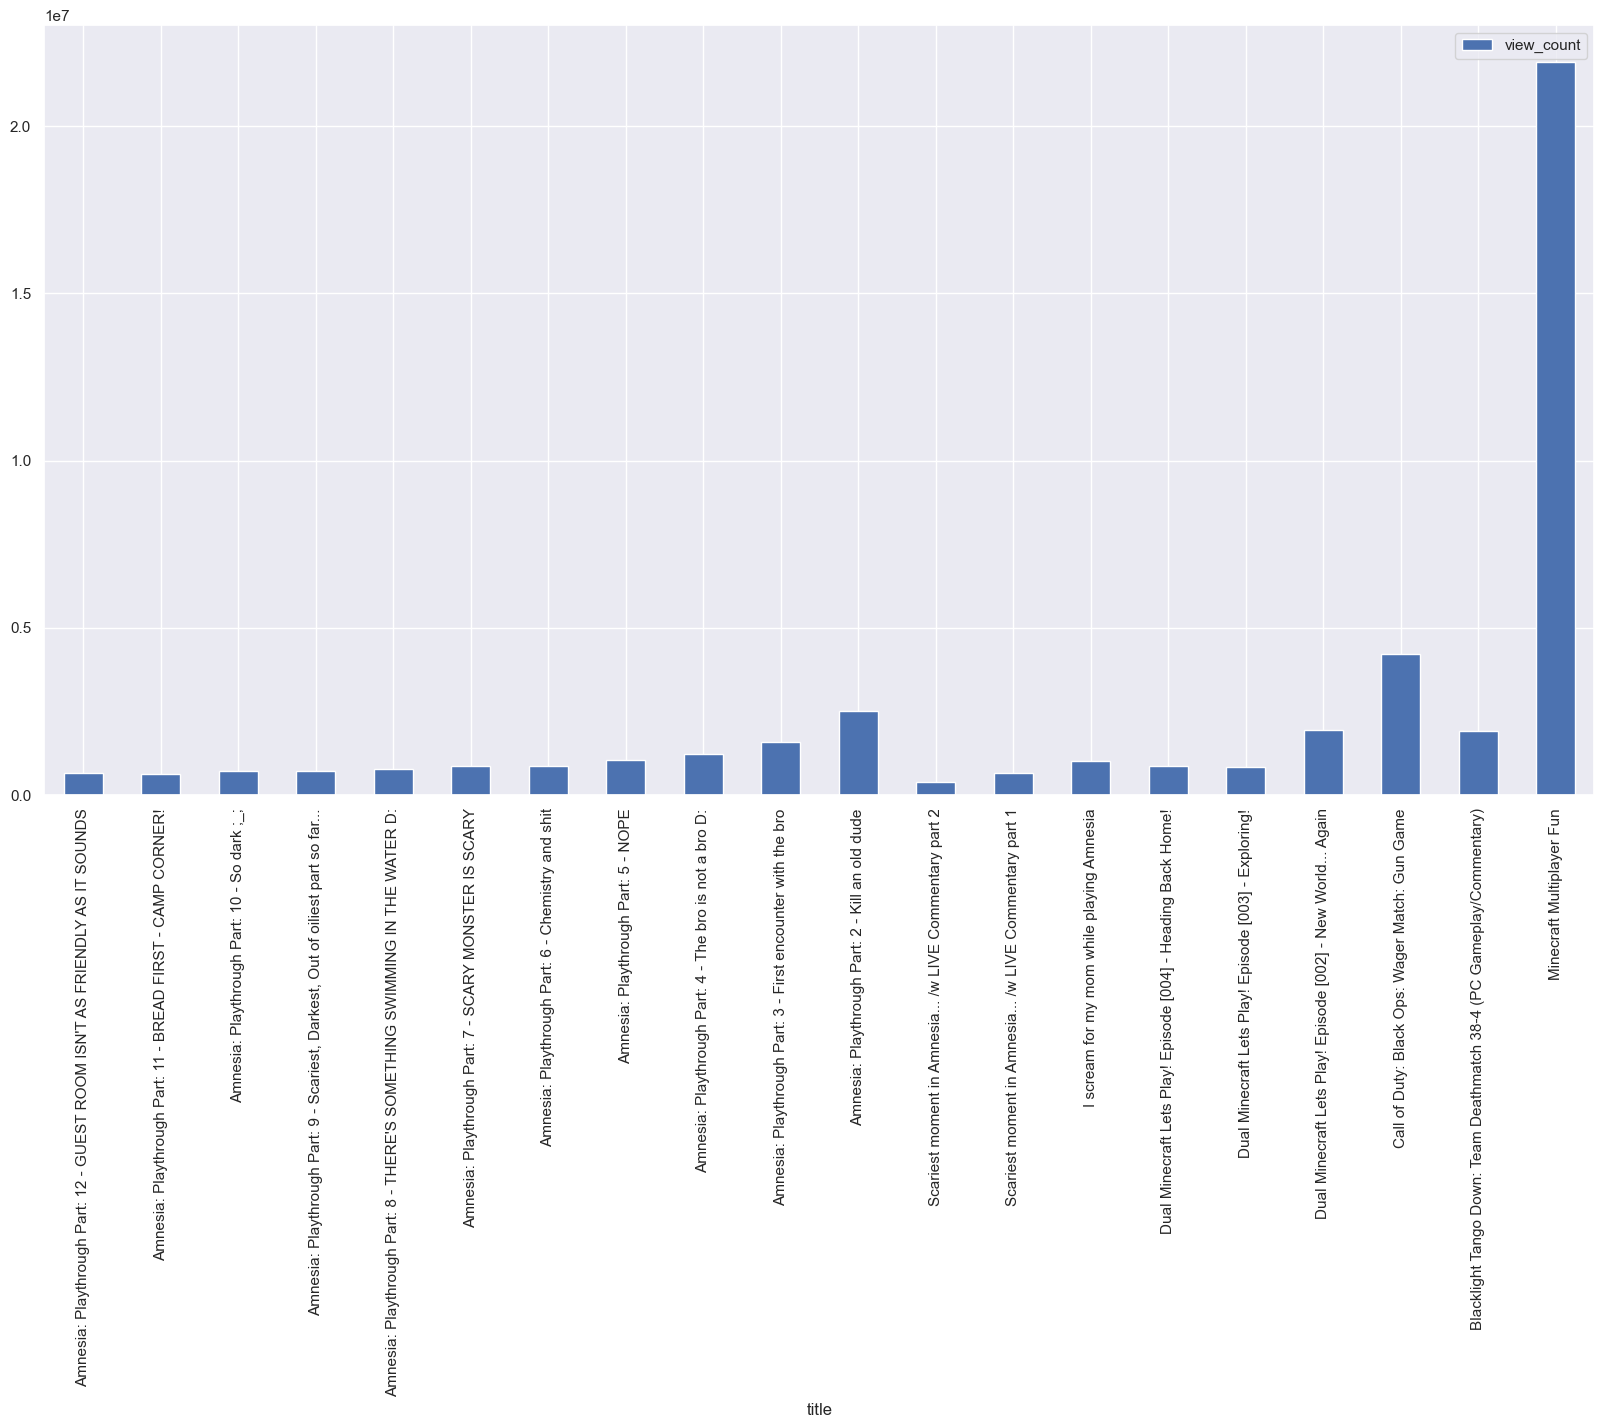

In [120]:
df.tail(20).plot(x="title", y=["view_count"], kind="bar") 

To conclude, cancel culture althought rampant, isn't as prominent or effective as people may think it is. It causes a temporary sharp incline for an apology video, a sharp decline in viewership right after an apology video, but slowly starts to gain viewership and traction the farther away we get from the date of cancellation.

In a further iteration, I would gather data from more sources. I would catagorize the reaoning of why they were canceled to see if people are more willing to forgive some "scandals" in comparison to others. I would also want to reasearch if frequency plays a role in cancel culture. If someone makes the same mistake more than once, then, would people forgive, or think that apologies we insincere, causing to a longer period of downtim to rebuild trust, and for people to move on.